# Import Module

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read data

In [575]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('public_dataset.csv')
submit = pd.read_csv('public_submission_template.csv')

In [576]:
train.shape

(11751, 22)

In [577]:
train.head()

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,...,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積,單價
0,TR-1,台北市,大安區,敦化南路二段,-0.256716,NaN,11,11,住家用,鋼筋混凝土造,...,-0.174154,-0.819326,0.0,305266,2768378,NaN,0.393926,0.183700,-0.438452,4.627714
1,TR-2,台北市,萬華區,水源路,0.100134,NaN,7,12,住家用,鋼筋混凝土造,...,0.314204,-0.819326,0.0,300677,2767990,NaN,-0.316131,0.608577,-0.438452,1.887258
2,TR-3,高雄市,鳳山區,北忠街,0.181921,NaN,10,15,集合住宅,其他,...,0.423366,0.161624,1.0,184815,2504666,NaN,-0.098871,-0.360620,1.525881,1.489072
3,TR-4,新北市,新莊區,福前街,0.085594,NaN,9,14,集合住宅,鋼筋混凝土造,...,0.164249,0.524653,1.0,296653,2772355,NaN,-0.071147,0.315088,0.231984,2.051217
4,TR-5,新北市,板橋區,文化路一段,-0.938116,NaN,41,43,住家用,鋼骨造,...,0.985839,0.532377,1.0,297377,2768472,NaN,0.791954,1.719400,-0.438452,3.269198


In [578]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      11751 non-null  object 
 1   縣市      11751 non-null  object 
 2   鄉鎮市區    11751 non-null  object 
 3   路名      11751 non-null  object 
 4   土地面積    11751 non-null  float64
 5   使用分區    595 non-null    object 
 6   移轉層次    11751 non-null  int64  
 7   總樓層數    11751 non-null  int64  
 8   主要用途    11751 non-null  object 
 9   主要建材    11751 non-null  object 
 10  建物型態    11751 non-null  object 
 11  屋齡      11751 non-null  float64
 12  建物面積    11751 non-null  float64
 13  車位面積    11751 non-null  float64
 14  車位個數    11751 non-null  float64
 15  橫坐標     11751 non-null  int64  
 16  縱坐標     11751 non-null  int64  
 17  備註      92 non-null     object 
 18  主建物面積   11751 non-null  float64
 19  陽台面積    11751 non-null  float64
 20  附屬建物面積  11751 non-null  float64
 21  單價      11751 non-null  float64
dty

In [579]:
test.head()

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,...,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積
0,PU-1,新北市,樹林區,大有路,2.039378,NaN,3,7,住家用,鋼筋混凝土造,...,13.916667,0.472202,0.146176,1.0,288745,2760266,NaN,0.849664,0.146161,-0.438452
1,PU-2,新北市,三重區,力行路一段,-0.077786,NaN,5,5,住家用,鋼筋混凝土造,...,40.833333,-0.546455,-0.819326,0.0,298751,2773492,NaN,-0.004102,0.064257,-0.438452
2,PU-3,新北市,板橋區,民生路三段,-0.555766,NaN,2,20,集合住宅,鋼筋混凝土造,...,1.333333,0.124032,-0.167419,1.0,297000,2769106,NaN,-0.285862,-0.775260,1.323042
3,PU-4,新北市,泰山區,明志路二段,-0.744838,NaN,6,16,住家用,鋼筋混凝土造,...,27.500000,-0.027072,0.115280,1.0,293076,2771160,NaN,0.027582,0.316794,-0.139532
4,PU-5,台北市,信義區,忠孝東路五段,-0.610923,NaN,3,7,住家用,鋼筋混凝土造,...,40.500000,-0.863600,-0.819326,0.0,308103,2770220,NaN,-0.883328,-0.560262,-0.075477


In [580]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5876 non-null   object 
 1   縣市      5876 non-null   object 
 2   鄉鎮市區    5876 non-null   object 
 3   路名      5876 non-null   object 
 4   土地面積    5876 non-null   float64
 5   使用分區    290 non-null    object 
 6   移轉層次    5876 non-null   int64  
 7   總樓層數    5876 non-null   int64  
 8   主要用途    5876 non-null   object 
 9   主要建材    5876 non-null   object 
 10  建物型態    5876 non-null   object 
 11  屋齡      5876 non-null   float64
 12  建物面積    5876 non-null   float64
 13  車位面積    5876 non-null   float64
 14  車位個數    5876 non-null   float64
 15  橫坐標     5876 non-null   int64  
 16  縱坐標     5876 non-null   int64  
 17  備註      48 non-null     object 
 18  主建物面積   5876 non-null   float64
 19  陽台面積    5876 non-null   float64
 20  附屬建物面積  5876 non-null   float64
dtypes: float64(8), int64(4), object(9)
me

# Concatate the data and do feature engineering.

In [581]:
data = pd.concat([train, test])
data.reset_index(inplace=True, drop=True)
data

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,...,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積,單價
0,TR-1,台北市,大安區,敦化南路二段,-0.256716,NaN,11,11,住家用,鋼筋混凝土造,...,-0.174154,-0.819326,0.0,305266,2768378,NaN,0.393926,0.183700,-0.438452,4.627714
1,TR-2,台北市,萬華區,水源路,0.100134,NaN,7,12,住家用,鋼筋混凝土造,...,0.314204,-0.819326,0.0,300677,2767990,NaN,-0.316131,0.608577,-0.438452,1.887258
2,TR-3,高雄市,鳳山區,北忠街,0.181921,NaN,10,15,集合住宅,其他,...,0.423366,0.161624,1.0,184815,2504666,NaN,-0.098871,-0.360620,1.525881,1.489072
3,TR-4,新北市,新莊區,福前街,0.085594,NaN,9,14,集合住宅,鋼筋混凝土造,...,0.164249,0.524653,1.0,296653,2772355,NaN,-0.071147,0.315088,0.231984,2.051217
4,TR-5,新北市,板橋區,文化路一段,-0.938116,NaN,41,43,住家用,鋼骨造,...,0.985839,0.532377,1.0,297377,2768472,NaN,0.791954,1.719400,-0.438452,3.269198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17622,PU-5872,台南市,中西區,中華西路二段,0.560113,NaN,5,5,集合住宅,鋼筋混凝土造,...,-0.788335,-0.016028,1.0,166751,2545157,NaN,-0.867769,-1.078987,-0.438452,NaN
17623,PU-5873,台中市,北區,育樂街,-1.020142,NaN,5,22,集合住宅,鋼筋混凝土造,...,-0.910137,0.799628,1.0,218814,2672567,NaN,-1.107095,-0.754784,-0.438452,NaN
17624,PU-5874,新北市,新店區,安康路二段,-0.662691,NaN,10,12,住家用,鋼筋混凝土造,...,-0.459699,0.004054,1.0,301609,2761359,NaN,-0.474267,-0.131972,-0.438452,NaN
17625,PU-5875,台北市,信義區,忠孝東路五段,0.513752,NaN,2,5,住家用,鋼筋混凝土造,...,0.357294,-0.819326,0.0,308833,2770624,NaN,0.926327,1.243333,-0.316749,NaN


count    11751.000000
mean         1.993343
std          1.002079
min          0.177415
25%          1.301691
50%          1.770145
75%          2.402558
max         13.622033
Name: 單價, dtype: float64


/var/folders/sc/k_p9ckj52bx05tk63dbry41c0000gn/T/ipykernel_87266/174075213.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['單價'], color='g', bins=100, hist_kws={'alpha': 0.4})
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

<Axes: xlabel='單價', ylabel='Density'>

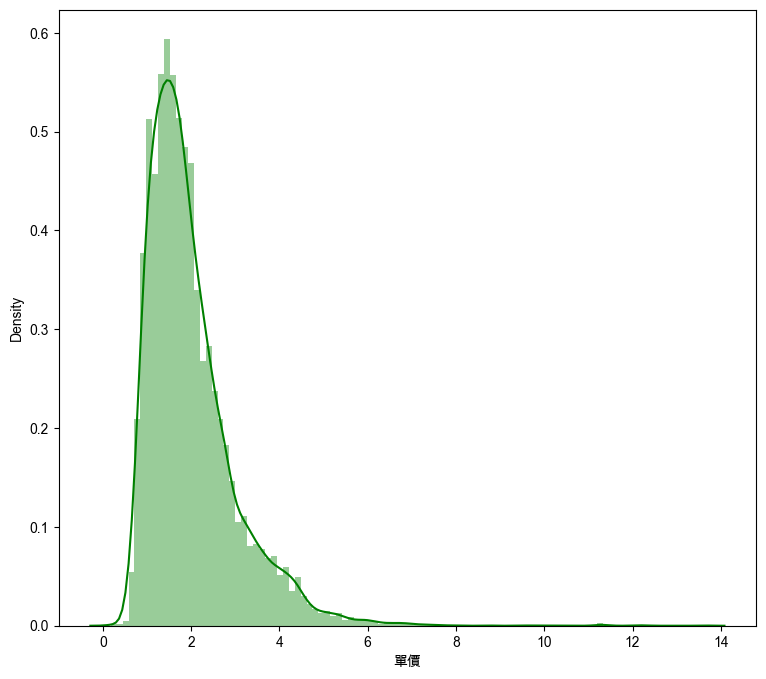

In [582]:
print(data['單價'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['單價'], color='g', bins=100, hist_kws={'alpha': 0.4})

/var/folders/sc/k_p9ckj52bx05tk63dbry41c0000gn/T/ipykernel_87266/3807325206.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=stats.johnsonsu)
/var/folders/sc/k_p9ckj52bx05tk63dbry41c0000gn/T/ipykernel_87266/3807325206.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kd

<Axes: title={'center': 'Log Normal'}, xlabel='單價'>

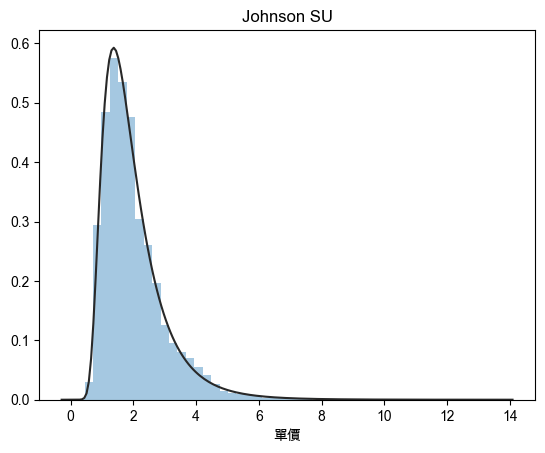

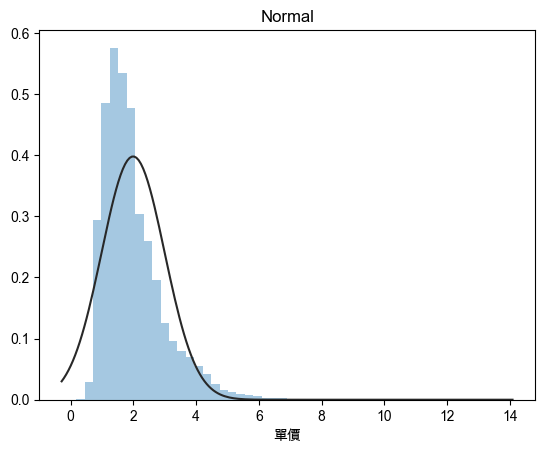

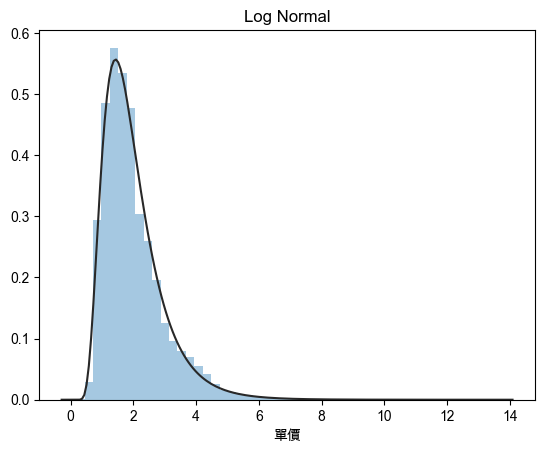

In [583]:
import scipy.stats as stats

y = data['單價']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

    看起來在去識別化時已經幫我們調整過，對預測標的「單價」不需多做調整

### 備註跟分區太沒用太少了，drop掉。

In [584]:
data.drop('使用分區', axis=1, inplace=True)
data.drop('備註', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)

In [585]:
data.columns

Index(['縣市', '鄉鎮市區', '路名', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態',
       '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積',
       '單價'],
      dtype='object')

### 「地址」，從內政部抓取實價登錄資料，以近一年的「元/每平方公尺」來代替。

- 112年第3季的實價登錄資料。

In [334]:
import os
import pandas as pd

folder_path = '112_3'  #read 112_3 folder

combined_data_112_3 = pd.DataFrame() #create a empty df to concat all file

for filename in os.listdir(folder_path):
    if filename.endswith("lvr_land_a.csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        combined_data_112_3 = pd.concat([combined_data_112_3, df], ignore_index=True)

In [335]:
combined_data_112_3.shape #(90866,33) same as 實價登錄's columns numbers

(90866, 33)

In [336]:
import os
import pandas as pd

folder_path = '112_2'  #read 112_2 folder

combined_data_112_2 = pd.DataFrame() 

for filename in os.listdir(folder_path):
    if filename.endswith("lvr_land_a.csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        combined_data_112_2 = pd.concat([combined_data_112_2, df], ignore_index=True)
        

In [337]:
combined_data_112_2.shape #(89280,33)

(89280, 33)

In [338]:
import os
import pandas as pd

folder_path = '112_1'  #read 112_2 folder

combined_data_112_1 = pd.DataFrame() 

for filename in os.listdir(folder_path):
    if filename.endswith("lvr_land_a.csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        combined_data_112_1 = pd.concat([combined_data_112_1, df], ignore_index=True)
        

In [339]:
combined_data_112_1.shape #(76316, 33)

(76316, 33)

In [340]:
import os
import pandas as pd

folder_path = '111_4'  #read 112_2 folder

combined_data_111_4 = pd.DataFrame() 

for filename in os.listdir(folder_path):
    if filename.endswith("lvr_land_a.csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        combined_data_111_4 = pd.concat([combined_data_111_4, df], ignore_index=True)
        

In [341]:
combined_data_111_4.shape #(87341, 33)

(87341, 33)

- 將四個檔案連結起來。

In [342]:
df_trans = pd.concat([combined_data_112_3, combined_data_112_2, combined_data_112_1, combined_data_111_4], ignore_index=True)
df_trans.shape

(343803, 33)

- 抓取 df_trans 中的兩欄位：「土地位置建物門牌」、「單價元平方公尺」

In [343]:
df_trans = df_trans[['土地位置建物門牌','單價元平方公尺']]
df_trans

,土地位置建物門牌,單價元平方公尺
0,land sector position building sector house num...,the unit price (NTD / square meter)
1,南興段496地號,42
2,中山段386-5地號,46667
3,大濱段宜灣小段464地號,141
4,大南段36地號,97
...,...,...
343798,麻園頭段713地號,63124
343799,沙工北段797-2地號,70000
343800,沙工北段797-1地號,70000
343801,臺中市南屯區大昌街１００號七樓之３,90090


- 訓練及預測檔案皆只有包含「房屋」，不包含純土地買賣，將參考訓練df_trans中的「地號」（即為土地），全部刪去，

In [344]:
df_trans = df_trans[~df_trans['土地位置建物門牌'].str.endswith('地號')]
df_trans

,土地位置建物門牌,單價元平方公尺
0,land sector position building sector house num...,the unit price (NTD / square meter)
7,臺東縣太麻里鄉龍泉路３０之１號五樓之１６,23374
8,臺東縣太麻里鄉龍泉路５５號八樓之１３,14895
13,臺東縣鹿野鄉圳頭路４８巷１８號,35163
14,臺東縣台東市文心路１７巷,NaN
...,...,...
343791,臺中市北屯區四平路５６８巷３號二十一樓之３,72074
343792,臺中市北屯區四平路５７６號二十三樓之５,72119
343793,臺中市北屯區四平路５６８巷３號二十一樓之６,75387
343801,臺中市南屯區大昌街１００號七樓之３,90090


- 將空值欄位刪去

In [345]:
df_trans.dropna(inplace=True)
df_trans

/var/folders/sc/k_p9ckj52bx05tk63dbry41c0000gn/T/ipykernel_87266/1164855613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans.dropna(inplace=True)


,土地位置建物門牌,單價元平方公尺
0,land sector position building sector house num...,the unit price (NTD / square meter)
7,臺東縣太麻里鄉龍泉路３０之１號五樓之１６,23374
8,臺東縣太麻里鄉龍泉路５５號八樓之１３,14895
13,臺東縣鹿野鄉圳頭路４８巷１８號,35163
16,臺東縣太麻里鄉龍泉路５３巷５號七樓之４１,23667
...,...,...
343791,臺中市北屯區四平路５６８巷３號二十一樓之３,72074
343792,臺中市北屯區四平路５７６號二十三樓之５,72119
343793,臺中市北屯區四平路５６８巷３號二十一樓之６,75387
343801,臺中市南屯區大昌街１００號七樓之３,90090


- 合併資料集中的「'縣市', '鄉鎮市區', '路名'」為一 col

In [586]:
data['建物地址'] = data['縣市'] + data['鄉鎮市區'] + data['路名']
data.drop(['縣市', '鄉鎮市區', '路名'], axis=1, inplace=True)
data

,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價,建物地址
0,-0.256716,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,0.183700,-0.438452,4.627714,台北市大安區敦化南路二段
1,0.100134,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,0.608577,-0.438452,1.887258,台北市萬華區水源路
2,0.181921,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,-0.360620,1.525881,1.489072,高雄市鳳山區北忠街
3,0.085594,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,0.315088,0.231984,2.051217,新北市新莊區福前街
4,-0.938116,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,1.719400,-0.438452,3.269198,新北市板橋區文化路一段
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17622,0.560113,5,5,集合住宅,鋼筋混凝土造,公寓(5樓含以下無電梯),0.833333,-0.788335,-0.016028,1.0,166751,2545157,-0.867769,-1.078987,-0.438452,NaN,台南市中西區中華西路二段
17623,-1.020142,5,22,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),3.416667,-0.910137,0.799628,1.0,218814,2672567,-1.107095,-0.754784,-0.438452,NaN,台中市北區育樂街
17624,-0.662691,10,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),12.583333,-0.459699,0.004054,1.0,301609,2761359,-0.474267,-0.131972,-0.438452,NaN,新北市新店區安康路二段
17625,0.513752,2,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),36.250000,0.357294,-0.819326,0.0,308833,2770624,0.926327,1.243333,-0.316749,NaN,台北市信義區忠孝東路五段


In [347]:
df_trans = df_trans.drop(df_trans.index[0])
df_trans

,土地位置建物門牌,單價元平方公尺
7,臺東縣太麻里鄉龍泉路３０之１號五樓之１６,23374
8,臺東縣太麻里鄉龍泉路５５號八樓之１３,14895
13,臺東縣鹿野鄉圳頭路４８巷１８號,35163
16,臺東縣太麻里鄉龍泉路５３巷５號七樓之４１,23667
21,臺東縣太麻里鄉龍泉路５１號八樓之２１,16253
...,...,...
343791,臺中市北屯區四平路５６８巷３號二十一樓之３,72074
343792,臺中市北屯區四平路５７６號二十三樓之５,72119
343793,臺中市北屯區四平路５６８巷３號二十一樓之６,75387
343801,臺中市南屯區大昌街１００號七樓之３,90090


In [348]:
df_trans.tail()

,土地位置建物門牌,單價元平方公尺
343791,臺中市北屯區四平路５６８巷３號二十一樓之３,72074
343792,臺中市北屯區四平路５７６號二十三樓之５,72119
343793,臺中市北屯區四平路５６８巷３號二十一樓之６,75387
343801,臺中市南屯區大昌街１００號七樓之３,90090
343802,臺中市北屯區文心路四段６３７號３樓之２,83007


In [349]:
average_prices = []

# 遍歷data，輸出相應df_trans中包含地址的平均地價。
for address in data["建物地址"]:
    
    filtered_data_trans = df_trans[df_trans["土地位置建物門牌"].str.contains(address, case=False, na=False)]

    filtered_data_trans["單價元平方公尺"] = pd.to_numeric(filtered_data_trans["單價元平方公尺"], errors='coerce')

    average_price = filtered_data_trans["單價元平方公尺"].mean()

    average_prices.append(average_price)

average_prices


/var/folders/sc/k_p9ckj52bx05tk63dbry41c0000gn/T/ipykernel_87266/3397443899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_trans["單價元平方公尺"] = pd.to_numeric(filtered_data_trans["單價元平方公尺"], errors='coerce')


KeyboardInterrupt: 

- 將average_prices輸出成csv檔，以利保存。

In [ ]:
average_prices_series = pd.Series(average_prices, name="平均單價元平方公尺")

csv_file = "average_prices.csv"

average_prices_series.to_csv(csv_file, index=False)

In [587]:
average_prices_series.shape

(17627,)

In [588]:
average_prices_series.isna().sum() #大約有1/3的值是空值，需要填入相應空值。

5989

count     11638.000000
mean     108454.360006
std       38548.470514
min        5928.000000
25%       79003.513636
50%      107086.952381
75%      133372.500000
max      510439.368421
Name: 平均單價元平方公尺, dtype: float64


/var/folders/sc/k_p9ckj52bx05tk63dbry41c0000gn/T/ipykernel_87266/800110706.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(average_prices_series, color='g', bins=100, hist_kws={'alpha': 0.4})
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='平均單價元平方公尺', ylabel='Density'>

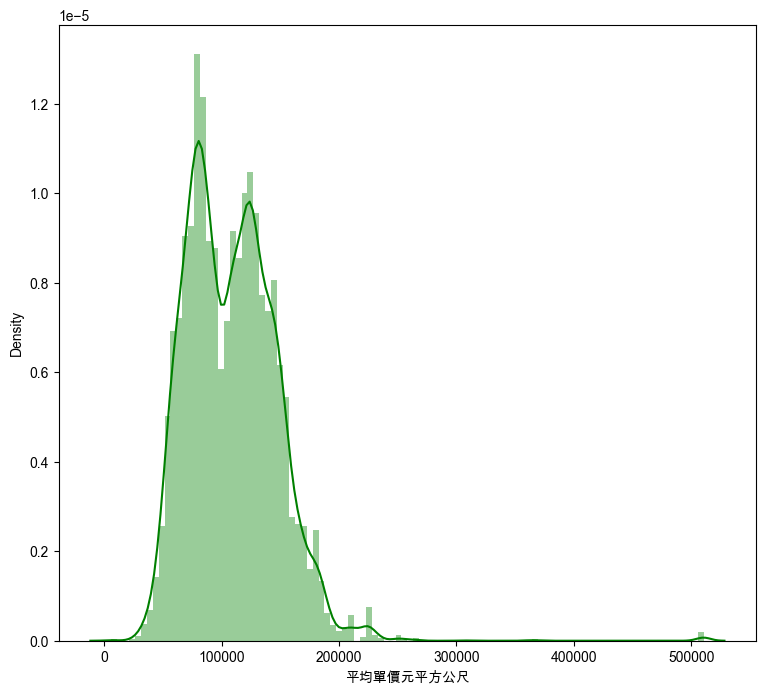

In [589]:
print(average_prices_series.describe())
plt.figure(figsize=(9, 8))
sns.distplot(average_prices_series, color='g', bins=100, hist_kws={'alpha': 0.4})


In [590]:
data = pd.concat([data, average_prices_series], axis = 1)
data.head()

,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價,建物地址,平均單價元平方公尺
0,-0.256716,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,0.183700,-0.438452,4.627714,台北市大安區敦化南路二段,NaN
1,0.100134,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,0.608577,-0.438452,1.887258,台北市萬華區水源路,NaN
2,0.181921,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,-0.360620,1.525881,1.489072,高雄市鳳山區北忠街,87474.500000
3,0.085594,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,0.315088,0.231984,2.051217,新北市新莊區福前街,143349.090909
4,-0.938116,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,1.719400,-0.438452,3.269198,新北市板橋區文化路一段,212444.990291


- 將橫坐標、縱座標利用函式轉換為經緯度。

- source : https://tylerastro.medium.com/twd97-to-longitude-latitude-dde820d83405

In [591]:
import math

def twd97_to_lonlat(x=174458.0,y=2525824.0):
    """
    Parameters
    ----------
    x : float
        TWD97 coord system. The default is 174458.0.
    y : float
        TWD97 coord system. The default is 2525824.0.
    Returns
    -------
    list
        [longitude, latitude]
    """
    
    a = 6378137
    b = 6356752.314245
    long_0 = 121 * math.pi / 180.0
    k0 = 0.9999
    dx = 250000
    dy = 0
    
    e = math.pow((1-math.pow(b, 2)/math.pow(a,2)), 0.5)
    
    x -= dx
    y -= dy
    
    M = y / k0
    
    mu = M / ( a*(1-math.pow(e, 2)/4 - 3*math.pow(e,4)/64 - 5 * math.pow(e, 6)/256))
    e1 = (1.0 - pow((1   - pow(e, 2)), 0.5)) / (1.0 +math.pow((1.0 -math.pow(e,2)), 0.5))
    
    j1 = 3*e1/2-27*math.pow(e1,3)/32
    j2 = 21 * math.pow(e1,2)/16 - 55 * math.pow(e1, 4)/32
    j3 = 151 * math.pow(e1, 3)/96
    j4 = 1097 * math.pow(e1, 4)/512
    
    fp = mu + j1 * math.sin(2*mu) + j2 * math.sin(4* mu) + j3 * math.sin(6*mu) + j4 * math.sin(8* mu)
    
    e2 = math.pow((e*a/b),2)
    c1 = math.pow(e2*math.cos(fp),2)
    t1 = math.pow(math.tan(fp),2)
    r1 = a * (1-math.pow(e,2)) / math.pow( (1-math.pow(e,2)* math.pow(math.sin(fp),2)), (3/2))
    n1 = a / math.pow((1-math.pow(e,2)*math.pow(math.sin(fp),2)),0.5)
    d = x / (n1*k0)
    
    q1 = n1* math.tan(fp) / r1
    q2 = math.pow(d,2)/2
    q3 = ( 5 + 3 * t1 + 10 * c1 - 4 * math.pow(c1,2) - 9 * e2 ) * math.pow(d,4)/24
    q4 = (61 + 90 * t1 + 298 * c1 + 45 * math.pow(t1,2) - 3 * math.pow(c1,2) - 252 * e2) * math.pow(d,6)/720
    lat = fp - q1 * (q2 - q3 + q4)
    
    
    q5 = d
    q6 = (1+2*t1+c1) * math.pow(d,3) / 6
    q7 = (5 - 2 * c1 + 28 * t1 - 3 * math.pow(c1,2) + 8 * e2 + 24 * math.pow(t1,2)) * math.pow(d,5) / 120
    lon = long_0 + (q5 - q6 + q7) / math.cos(fp)
    
    lat = (lat*180) / math.pi
    lon = (lon*180) / math.pi
    return [lon, lat]

twd97_to_lonlat(x = 305266, y = 2768378)

[121.54760767694441, 25.022469126806683]

In [592]:
df_ll = pd.DataFrame(zip(data['橫坐標'],data['縱坐標']))
print(df_ll)

            0        1
0      305266  2768378
1      300677  2767990
2      184815  2504666
3      296653  2772355
4      297377  2768472
...       ...      ...
17622  166751  2545157
17623  218814  2672567
17624  301609  2761359
17625  308833  2770624
17626  298924  2765519

[17627 rows x 2 columns]


In [593]:
result = df_ll.apply(lambda row: pd.Series(twd97_to_lonlat(row[0], row[1])), axis=1)
result = result.rename(columns={0: 'lng', 1: 'lat'})
result

,lng,lat
0,121.547608,25.022469
1,121.502124,25.019127
2,120.365799,22.640966
3,121.462402,25.058663
4,121.469444,25.023585
...,...,...
17622,120.187896,23.005809
17623,120.693103,24.158104
17624,121.511111,24.959230
17625,121.583046,25.042611


In [594]:
data = pd.concat([data,result],axis=1)
data.head()

,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價,建物地址,平均單價元平方公尺,lng,lat
0,-0.256716,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,0.183700,-0.438452,4.627714,台北市大安區敦化南路二段,NaN,121.547608,25.022469
1,0.100134,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,0.608577,-0.438452,1.887258,台北市萬華區水源路,NaN,121.502124,25.019127
2,0.181921,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,-0.360620,1.525881,1.489072,高雄市鳳山區北忠街,87474.500000,120.365799,22.640966
3,0.085594,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,0.315088,0.231984,2.051217,新北市新莊區福前街,143349.090909,121.462402,25.058663
4,-0.938116,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,1.719400,-0.438452,3.269198,新北市板橋區文化路一段,212444.990291,121.469444,25.023585


In [ ]:
data.drop(['橫坐標','縱坐標'], axis=1, inplace= True)
data.head()

,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,主建物面積,陽台面積,附屬建物面積,單價,建物地址,平均單價元平方公尺,lng,lat
0,-0.256716,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,0.0,0.393926,0.183700,-0.438452,4.627714,台北市大安區敦化南路二段,NaN,121.547608,25.022469
1,0.100134,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,0.314204,-0.819326,0.0,-0.316131,0.608577,-0.438452,1.887258,台北市萬華區水源路,NaN,121.502124,25.019127
2,0.181921,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,1.0,-0.098871,-0.360620,1.525881,1.489072,高雄市鳳山區北忠街,87474.500000,120.365799,22.640966
3,0.085594,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,1.0,-0.071147,0.315088,0.231984,2.051217,新北市新莊區福前街,143349.090909,121.462402,25.058663
4,-0.938116,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,0.985839,0.532377,1.0,0.791954,1.719400,-0.438452,3.269198,新北市板橋區文化路一段,212444.990291,121.469444,25.023585


In [595]:
data.shape

(17627, 20)

### 對各個類別特徵做 one-hot encoding

In [596]:
data['主要用途'].value_counts()

主要用途
住家用      12334
集合住宅      3993
其他         717
商業用        385
一般事務所       93
國民住宅        46
住商用         18
工業用         16
辦公室         15
住工用          6
店鋪           3
廠房           1
Name: count, dtype: int64

一般事務所、辦公室、店舖併進商業用，國民住宅、住商、住工併進住家用，工業用、廠房併進其他。

In [597]:
apply_map = {'住家用':'住家用', '國民住宅':'住家用', '住商用':'住家用', '住工用':'住家用', 
             '集合住宅':'集合住宅', 
             '其他':'其他', '工業用':'其他', '廠房':'其他',
             '商業用':'商業用', '一般事務所':'商業用', '辦公室':'商業用', '店鋪':'商業用'}

data['主要用途'] = data['主要用途'].map(apply_map)
data['主要用途'].value_counts()

主要用途
住家用     12404
集合住宅     3993
其他        734
商業用       496
Name: count, dtype: int64

In [598]:
data = pd.get_dummies(data, columns=['主要用途'])

In [599]:
data.columns

Index(['土地面積', '移轉層次', '總樓層數', '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數',
       '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積', '單價', '建物地址', '平均單價元平方公尺',
       'lng', 'lat', '主要用途_住家用', '主要用途_其他', '主要用途_商業用', '主要用途_集合住宅'],
      dtype='object')

- 主要建材的 one-hot encoding

In [600]:
data['主要建材'].value_counts()

主要建材
鋼筋混凝土造       16422
鋼骨造            603
加強磚造           371
其他             215
鋼筋混凝土加強磚造       13
磚造               3
Name: count, dtype: int64

鋼筋混凝土加強磚造併進鋼筋混凝土造，磚造併進加強磚造。

In [601]:
material_map = {'鋼筋混凝土造':'鋼筋混凝土造', '鋼筋混凝土加強磚造':'鋼筋混凝土造', 
                '鋼骨造':'鋼骨造', 
                '加強磚造':'加強磚造', '磚造':'加強磚造',
                '其他':'其他'}

data['主要建材'] = data['主要建材'].map(material_map)
data['主要建材'].value_counts()

主要建材
鋼筋混凝土造    16435
鋼骨造         603
加強磚造        374
其他          215
Name: count, dtype: int64

In [602]:
data = pd.get_dummies(data, columns=['主要建材'])

In [603]:
data.columns

Index(['土地面積', '移轉層次', '總樓層數', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標',
       '縱坐標', '主建物面積', '陽台面積', '附屬建物面積', '單價', '建物地址', '平均單價元平方公尺', 'lng',
       'lat', '主要用途_住家用', '主要用途_其他', '主要用途_商業用', '主要用途_集合住宅', '主要建材_其他',
       '主要建材_加強磚造', '主要建材_鋼筋混凝土造', '主要建材_鋼骨造'],
      dtype='object')

- 發現建物型態與樓層數高度相關，drop掉避免互相影響。

In [604]:
data['建物型態'].value_counts()

建物型態
住宅大樓(11層含以上有電梯)    10667
公寓(5樓含以下無電梯)        3713
華廈(10層含以下有電梯)       3236
透天厝                   11
Name: count, dtype: int64

In [605]:
data.drop('建物型態' , axis=1, inplace=True)

In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17627 entries, 0 to 17626
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   土地面積         17627 non-null  float64
 1   移轉層次         17627 non-null  int64  
 2   總樓層數         17627 non-null  int64  
 3   屋齡           17627 non-null  float64
 4   建物面積         17627 non-null  float64
 5   車位面積         17627 non-null  float64
 6   車位個數         17627 non-null  float64
 7   橫坐標          17627 non-null  int64  
 8   縱坐標          17627 non-null  int64  
 9   主建物面積        17627 non-null  float64
 10  陽台面積         17627 non-null  float64
 11  附屬建物面積       17627 non-null  float64
 12  單價           11751 non-null  float64
 13  建物地址         17627 non-null  object 
 14  平均單價元平方公尺    11638 non-null  float64
 15  lng          17627 non-null  float64
 16  lat          17627 non-null  float64
 17  主要用途_住家用     17627 non-null  bool   
 18  主要用途_其他      17627 non-null  bool   
 19  主要用途

## 經緯度連接外部資料集：
    選擇以下特徵： 醫療機構（只取醫院以上）； 捷運站 ； 火車站 ； 國小、國中、高中、大學。

- 醫院：方圓三公里內有無。

- 捷運站：一公里內有幾個捷運站。

- 火車站：三公里內有無。

- 學區：三公里有幾個學校。

In [116]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 794.5 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


    醫院

In [382]:
data_hospital = pd.read_csv('external_data/醫療機構基本資料.csv')
data_hospital.columns

Index(['機構代碼', '機構名稱', '權屬別', '型態別', '縣市鄉鎮', '電話', '地址', '診療科別', '醫師', '中醫師',
       '牙醫師', '藥師', '藥劑生', '護理師', '護士', '助產士', '助產師', '醫事檢驗師', '醫事檢驗生', '鑲牙生',
       '中藥員', '齒模員', '接骨員', '物理治療師', '職能治療師', '醫事放射師', '醫事放射士', '物理治療生',
       '職能治療生', '呼吸治療師', '諮商心理師', '臨床心理師', '營養師', '語言治療師', '牙體技術師', '聽力師',
       '牙體技術生', '驗光師', '驗光生', 'lat', 'lng'],
      dtype='object')

In [383]:
data_hospital['型態別'].value_counts()

型態別
西醫診所       6819
牙醫一般診所     4227
西醫專科診所     3391
牙醫診所       2633
中醫診所       2342
中醫一般診所     1647
西醫醫務室      1259
衛生所         360
醫院          267
綜合醫院        152
中醫專科診所       61
牙醫專科診所       52
精神科醫院        40
捐血站          13
病理中心         12
慢性醫院         10
捐血中心          5
中醫醫院          4
專科醫院          3
其他醫療機構        3
精神科教學醫院       1
牙醫醫院          1
Name: count, dtype: int64

    將其中的醫院、綜合醫院等篩選出來，保留他們的位置「lat」、「lng」。

In [384]:
filter_hospital = ['醫院','綜合醫院']
data_hospital = data_hospital[data_hospital['型態別'].isin(filter_hospital)]

In [385]:
data_hospital['型態別'].value_counts()

型態別
醫院      267
綜合醫院    152
Name: count, dtype: int64

In [386]:
#只保留lat, lng
data_hospital = data_hospital[['lat','lng']]
data_hospital

,lat,lng
10267,23.954967,120.570300
10268,23.487692,120.506515
10598,24.253839,120.535773
10599,24.216935,120.666319
10601,24.111226,120.650190
...,...,...
22432,24.199536,120.612101
22458,22.634354,120.293768
22563,23.764250,120.700035
22699,23.984773,120.685928


In [387]:
data[['lat','lng']]

,lat,lng
0,25.022469,121.547608
1,25.019127,121.502124
2,22.640966,120.365799
3,25.058663,121.462402
4,25.023585,121.469444
...,...,...
17622,23.005809,120.187896
17623,24.158104,120.693103
17624,24.959230,121.511111
17625,25.042611,121.583046


### 載入經緯度距離套件，並且計算3公里是否有醫療機構。

In [398]:
from geopy.distance import geodesic

# 假设你有两个数据集 data 和 contrast，分别包含经度和纬度列
# 创建一个空的新列用于存储结果
data['hospital_within_1km'] = False

# 遍历 data 数据集
for index, row_data in data.iterrows():
    lat1, lng1 = row_data['lat'], row_data['lng']
    
    # 遍历 contrast 数据集
    for _, row_contrast in data_hospital.iterrows():
        lat2, lng2 = row_contrast['lat'], row_contrast['lng']
        
        # 计算两点之间的距离
        distance = geodesic((lat1, lng1), (lat2, lng2)).kilometers
        
        # 如果距离小于等于1公里，则将 within_1km 列设置为 True
        if distance <= 1:
            data.at[index, 'hospital_within_1km'] = True
            break  # 如果已经找到一个在一公里内的点，可以跳出内层循环

data['hospital_within_1km'].value_counts()


hospital_within_1km
False    8814
True     8813
Name: count, dtype: int64

In [436]:
print(data[data['hospital_within_1km']==True]['單價'].describe())
print('-'*50)
print(data[data['hospital_within_1km']==False]['單價'].describe())

count    5876.000000
mean        2.081095
std         1.043328
min         0.177415
25%         1.325113
50%         1.816990
75%         2.525527
max        11.326608
Name: 單價, dtype: float64
--------------------------------------------------
count    5875.000000
mean        1.905576
std         0.951073
min         0.285145
25%         1.278268
50%         1.676454
75%         2.285444
max        13.622033
Name: 單價, dtype: float64


In [444]:
print('一公里內有醫院')
print(data[data['hospital_within_1km']==True]['平均單價元平方公尺'].describe())
print('-'*50)
print('一公里內無醫院')
print(data[data['hospital_within_1km']==False]['平均單價元平方公尺'].describe())

一公里內有醫院
count      5532.000000
mean     113018.750236
std       39146.176238
min        5928.000000
25%       80476.604167
50%      112832.454545
75%      141814.979592
max      364314.166667
Name: 平均單價元平方公尺, dtype: float64
--------------------------------------------------
一公里內無醫院
count      6106.000000
mean     104319.049368
std       37525.641914
min       22136.250000
25%       77818.136364
50%      103172.620588
75%      125466.000000
max      510439.368421
Name: 平均單價元平方公尺, dtype: float64


In [399]:
data.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標',
       '主建物面積', '陽台面積', '附屬建物面積', '單價', '建物地址', '平均單價元平方公尺', 'lng', 'lat',
       '主要用途_住家用', '主要用途_其他', '主要用途_商業用', '主要用途_集合住宅', '主要建材_其他', '主要建材_加強磚造',
       '主要建材_鋼筋混凝土造', '主要建材_鋼骨造', 'hospital_within_1km'],
      dtype='object')

In [609]:
data['hospital_within_1km'].value_counts()

hospital_within_1km
False    8814
True     8813
Name: count, dtype: int64

將醫院檔案輸出以利保存

In [401]:
hospital_series = pd.Series(data['hospital_within_1km'], name='hospital_within_1km')

csv_file = "hospital_in_1km.csv"

hospital_series.to_csv(csv_file, index=False)

    方圓三公里內有無火車站

In [402]:
data_railway = pd.read_csv('external_data/火車站點資料.csv')
data_railway.columns

Index(['站點ID', '站點名稱', '站點地址', '車站級別', 'lat', 'lng'], dtype='object')

只取三等站以上的站別

In [403]:
data_railway = data_railway[data_railway['車站級別'] < 4]
data_railway['車站級別'].value_counts()

車站級別
3    71
1    28
2    25
0     4
Name: count, dtype: int64

In [404]:
data_railway = data_railway[['lat','lng']]
data_railway

,lat,lng
4,24.13747,120.68691
8,24.10976,120.61429
9,24.11424,120.59021
10,24.08171,120.53828
13,23.95933,120.56995
...,...,...
229,25.08711,121.82741
230,25.10861,121.80596
233,25.10281,121.76192
235,24.73811,121.09465


In [406]:
data[['lat','lng']]

,lat,lng
0,25.022469,121.547608
1,25.019127,121.502124
2,22.640966,120.365799
3,25.058663,121.462402
4,25.023585,121.469444
...,...,...
17622,23.005809,120.187896
17623,24.158104,120.693103
17624,24.959230,121.511111
17625,25.042611,121.583046


In [413]:
data.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標',
       '主建物面積', '陽台面積', '附屬建物面積', '單價', '建物地址', '平均單價元平方公尺', 'lng', 'lat',
       '主要用途_住家用', '主要用途_其他', '主要用途_商業用', '主要用途_集合住宅', '主要建材_其他', '主要建材_加強磚造',
       '主要建材_鋼筋混凝土造', '主要建材_鋼骨造', 'hospital_within_1km'],
      dtype='object')

In [456]:
data['railway_within_0.5km'] = False

# 遍历 data 数据集
for index, row_data in data.iterrows():
    lat1, lng1 = row_data['lat'], row_data['lng']
    
    # 遍历 contrast 数据集
    for _, row_contrast in data_railway.iterrows():
        lat2, lng2 = row_contrast['lat'], row_contrast['lng']
        
        # 计算两点之间的距离
        distance = geodesic((lat1, lng1), (lat2, lng2)).kilometers
        
        # 如果距离小于等于1公里，则将 within_1km 列设置为 True
        if distance <= 0.5:
            data.at[index, 'railway_within_0.5km'] = True
            break  # 如果已经找到一个在一公里内的点，可以跳出内层循环

data['railway_within_0.5km'].value_counts()


railway_within_0.5km
False    17253
True       374
Name: count, dtype: int64

In [457]:
print(data['railway_within_0.5km'].value_counts())
print(data['railway_within_1km'].value_counts())
print(data['railway_within_1.5km'].value_counts())
print(data['railway_within_2km'].value_counts())
print(data['railway_within_3km'].value_counts())

railway_within_0.5km
False    17253
True       374
Name: count, dtype: int64
railway_within_1km
False    16127
True      1500
Name: count, dtype: int64
railway_within_1.5km
False    14619
True      3008
Name: count, dtype: int64
railway_within_2km
False    13012
True      4615
Name: count, dtype: int64
railway_within_3km
True     9186
False    8441
Name: count, dtype: int64


In [454]:
print('2公里內有車站的單價')
print(data[data['railway_within_2km']==True]['單價'].describe())
print('-'*50)
print('2公里內無車站的單價')
print(data[data['railway_within_2km']==False]['單價'].describe())

2公里內有車站的單價
count    3051.000000
mean        2.021921
std         1.092789
min         0.285145
25%         1.186919
50%         1.723299
75%         2.660207
max         7.672666
Name: 單價, dtype: float64
--------------------------------------------------
2公里內無車站的單價
count    8700.000000
mean        1.983321
std         0.968124
min         0.177415
25%         1.348536
50%         1.770145
75%         2.379135
max        13.622033
Name: 單價, dtype: float64


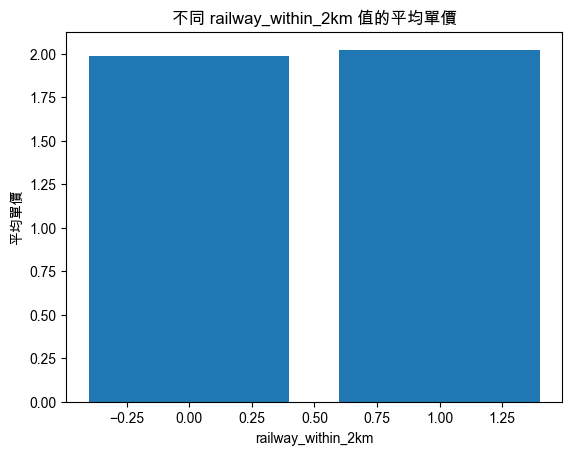

In [520]:
average_prices = data.groupby('railway_within_2km')['單價'].mean()

plt.bar(average_prices.index, average_prices)

plt.xlabel('railway_within_2km')
plt.ylabel('平均單價')
plt.title('不同 railway_within_2km 值的平均單價')


plt.show()

In [445]:
print('3公里內有車站的單價')
print(data[data['railway_within_3km']==True]['單價'].describe())
print('-'*50)
print('3公里內無車站的單價')
print(data[data['railway_within_3km']==False]['單價'].describe())

3公里內有車站的單價
count    6140.000000
mean        2.033994
std         1.132753
min         0.177415
25%         1.230251
50%         1.723299
75%         2.519671
max        12.263516
Name: 單價, dtype: float64
--------------------------------------------------
3公里內無車站的單價
count    5611.000000
mean        1.948860
std         0.833834
min         0.177415
25%         1.388355
50%         1.784198
75%         2.332290
max        13.622033
Name: 單價, dtype: float64


In [452]:
print('1.5公里內有車站的單價')
print(data[data['railway_within_1.5km']==True]['單價'].describe())
print('-'*50)
print('1.5公里內無車站的單價')
print(data[data['railway_within_1.5km']==False]['單價'].describe())

1.5公里內有車站的單價
count    1977.000000
mean        2.012326
std         1.024816
min         0.285145
25%         1.208000
50%         1.770145
75%         2.660207
max         6.384417
Name: 單價, dtype: float64
--------------------------------------------------
1.5公里內無車站的單價
count    9774.000000
mean        1.989503
std         0.997426
min         0.177415
25%         1.325113
50%         1.770145
75%         2.379135
max        13.622033
Name: 單價, dtype: float64


In [448]:
print('1公里內有車站的單價')
print(data[data['railway_within_1km']==True]['單價'].describe())
print('-'*50)
print('1公里內無車站的單價')
print(data[data['railway_within_1km']==False]['單價'].describe())

1公里內有車站的單價
count    983.000000
mean       2.006090
std        1.003317
min        0.285145
25%        1.212684
50%        1.770145
75%        2.636785
max        6.384417
Name: 單價, dtype: float64
--------------------------------------------------
1公里內無車站的單價
count    10768.000000
mean         1.992179
std          1.002004
min          0.177415
25%          1.301691
50%          1.770145
75%          2.379135
max         13.622033
Name: 單價, dtype: float64


In [464]:
print('0.5公里內有車站的單價')
print(data[data['railway_within_0.5km']==True]['單價'].describe())
print('-'*50)
print('0.5公里內無車站的單價')
print(data[data['railway_within_0.5km']==False]['單價'].describe())

0.5公里內有車站的單價
count    244.000000
mean       1.985614
std        1.001780
min        0.622432
25%        1.208000
50%        1.688165
75%        2.543094
max        4.651137
Name: 單價, dtype: float64
--------------------------------------------------
0.5公里內無車站的單價
count    11507.000000
mean         1.993507
std          1.002128
min          0.177415
25%          1.301691
50%          1.770145
75%          2.402558
max         13.622033
Name: 單價, dtype: float64


將車站檔案輸出以利保存

In [459]:
railway_series = pd.Series(data['railway_within_0.5km'], name='railway_within_0.5km')
csv_file = "railway_in_0.5km.csv"
railway_series.to_csv(csv_file, index=False)

railway_series = pd.Series(data['railway_within_1km'], name='railway_within_1km')
csv_file = "railway_in_1km.csv"
railway_series.to_csv(csv_file, index=False)

railway_series = pd.Series(data['railway_within_1.5km'], name='railway_within_1.5km')
csv_file = "railway_in_1.5km.csv"
railway_series.to_csv(csv_file, index=False)

railway_series = pd.Series(data['railway_within_2km'], name='railway_within_2km')
csv_file = "railway_in_2km.csv"
railway_series.to_csv(csv_file, index=False)

railway_series = pd.Series(data['railway_within_3km'], name='railway_within_3km')
csv_file = "railway_in_3km.csv"
railway_series.to_csv(csv_file, index=False)

In [470]:
data.drop(['railway_within_0.5km', 'railway_within_1km','railway_within_1.5km', 'railway_within_3km'], axis=1, inplace=True)

In [471]:
data.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標',
       '主建物面積', '陽台面積', '附屬建物面積', '單價', '建物地址', '平均單價元平方公尺', 'lng', 'lat',
       '主要用途_住家用', '主要用途_其他', '主要用途_商業用', '主要用途_集合住宅', '主要建材_其他', '主要建材_加強磚造',
       '主要建材_鋼筋混凝土造', '主要建材_鋼骨造', 'hospital_within_1km', 'railway_within_2km'],
      dtype='object')

In [472]:
data.head()

,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,...,主要用途_住家用,主要用途_其他,主要用途_商業用,主要用途_集合住宅,主要建材_其他,主要建材_加強磚造,主要建材_鋼筋混凝土造,主要建材_鋼骨造,hospital_within_1km,railway_within_2km
0,-0.256716,11,11,32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,...,True,False,False,False,False,False,True,False,True,False
1,0.100134,7,12,24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,...,True,False,False,False,False,False,True,False,False,True
2,0.181921,10,15,6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,...,False,False,False,True,True,False,False,False,False,True
3,0.085594,9,14,8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,...,False,False,False,True,False,False,True,False,False,False
4,-0.938116,41,43,11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,...,True,False,False,False,False,False,False,True,True,True


捷運站資料中只有：台北市、新北市、桃園市、高雄市（無台中市）

In [473]:
data_mrt = pd.read_csv('external_data/捷運站點資料.csv')
data_mrt.columns

Index(['站點UID', '站點ID', '站點名稱', '站點地址', '假日自行車進出與否', 'lat', 'lng'], dtype='object')

In [476]:
data_mrt['站點地址'].str[0:3].unique() #沒有台中

array(['112', '251', '231', '235', '220', '242', '248', '新北市', nan, '高雄市',
       '台北市', '桃園市', '236', '108', '100', '106', '110', '115', '板南線',
       '116', '105', '104', '114', '文湖線', '103', '234', '241', '247',
       '111', '五福四', '大公路', '興隆路', '中正一', '凱旋二', '凱旋三', '瑞西街'],
      dtype=object)

In [477]:
data_mrt = data_mrt[['lat','lng']]
data_mrt

,lat,lng
0,25.137497,121.485456
1,25.130923,121.473298
2,25.125510,121.467000
3,25.136900,121.459550
4,25.153990,121.458800
...,...,...
234,22.625200,120.323700
235,22.621210,120.325200
236,22.616930,120.326900
237,22.612530,120.327200


In [478]:
data['建物地址'].str[0:3].unique()

array(['台北市', '高雄市', '新北市', '桃園市', '台中市', '台南市', '苗栗縣', '新竹縣', '基隆市',
       '屏東縣', '新竹市', '宜蘭縣', '花蓮縣', '嘉義市', '金門縣', '嘉義縣', '彰化縣', '雲林縣'],
      dtype=object)

In [483]:
data['mrt_numbs_within_0.5km'] = 0
mrt_cities = ['台北市', '新北市', '桃園市', '高雄市']

# 遍历 data 数据集
for index, row_data in data.iterrows():
    if row_data['建物地址'][:3] in mrt_cities:
        lat1, lng1 = row_data['lat'], row_data['lng']
        mrt_count = 0
    # 遍历 contrast 数据集
        for _, row_contrast in data_mrt.iterrows():
            lat2, lng2 = row_contrast['lat'], row_contrast['lng']
        
        # 计算两点之间的距离
            distance = geodesic((lat1, lng1), (lat2, lng2)).kilometers
        
        # 如果距离小于等于1公里，则将 within_1km 列设置为 True
            if distance <= 0.5:
                mrt_count += 1
        
        data.at[index, 'mrt_numbs_within_0.5km'] = mrt_count
    
data['mrt_numbs_within_1km'].value_counts()


mrt_numbs_within_1km
0     9137
1     2530
2     2529
3     1533
4      868
5      584
6      216
7      140
8       55
9       33
10       2
Name: count, dtype: int64

In [484]:
data['mrt_numbs_within_0.5km'].value_counts()

mrt_numbs_within_0.5km
0    13074
1     3330
2     1010
3      200
4        9
5        4
Name: count, dtype: int64

將捷運資料保存

In [485]:
railway_series = pd.Series(data['mrt_numbs_within_1km'], name='mrt_numbs_within_1km')
csv_file = "mrt_numbs_within_1km.csv"
railway_series.to_csv(csv_file, index=False)

railway_series = pd.Series(data['mrt_numbs_within_0.5km'], name='mrt_numbs_within_0.5km')
csv_file = "mrt_numbs_within_0.5km.csv"
railway_series.to_csv(csv_file, index=False)

In [486]:
pd.read_csv('mrt_numbs_within_0.5km.csv').value_counts()

mrt_numbs_within_0.5km
0                         13074
1                          3330
2                          1010
3                           200
4                             9
5                             4
Name: count, dtype: int64

In [509]:
data[data['mrt_numbs_within_1km']>8]['單價'].describe()

count    27.000000
mean      4.155790
std       2.782754
min       2.379135
25%       2.730475
50%       3.222352
75%       3.971879
max      12.263516
Name: 單價, dtype: float64

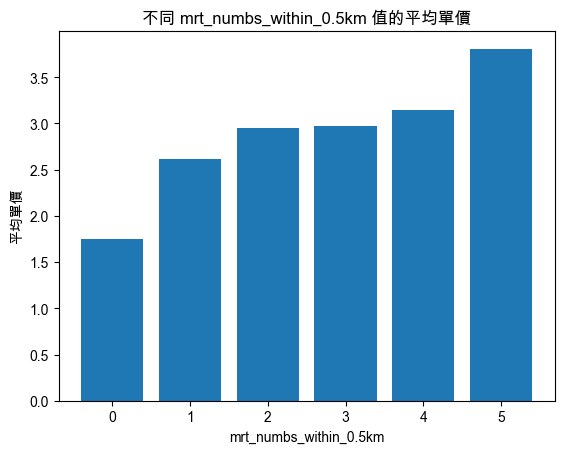

In [518]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

average_prices = data.groupby('mrt_numbs_within_0.5km')['單價'].mean()

plt.bar(average_prices.index, average_prices)

plt.xlabel('mrt_numbs_within_0.5km')
plt.ylabel('平均單價')
plt.title('不同 mrt_numbs_within_0.5km 值的平均單價')


plt.show()


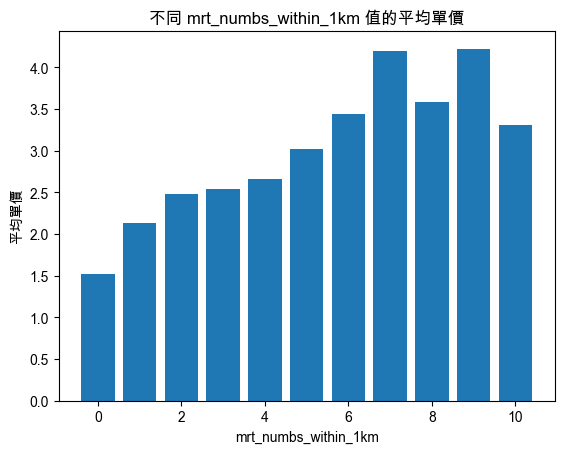

In [519]:
average_prices = data.groupby('mrt_numbs_within_1km')['單價'].mean()

plt.bar(average_prices.index, average_prices)

plt.xlabel('mrt_numbs_within_1km')
plt.ylabel('平均單價')
plt.title('不同 mrt_numbs_within_1km 值的平均單價')


plt.show()

In [530]:
data.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標',
       '主建物面積', '陽台面積', '附屬建物面積', '單價', '建物地址', '平均單價元平方公尺', 'lng', 'lat',
       '主要用途_住家用', '主要用途_其他', '主要用途_商業用', '主要用途_集合住宅', '主要建材_其他', '主要建材_加強磚造',
       '主要建材_鋼筋混凝土造', '主要建材_鋼骨造', 'hospital_within_1km', 'railway_within_2km',
       'mrt_numbs_within_1km'],
      dtype='object')

In [545]:
elemenatry = pd.read_csv('external_data/國小基本資料.csv')
senior = pd.read_csv('external_data/國中基本資料.csv')
high = pd.read_csv('external_data/高中基本資料.csv')
college = pd.read_csv('external_data/大學基本資料.csv')

elemenatry = elemenatry[['lat','lng']]
senior = senior[['lat','lng']]
high = high[['lat','lng']]
college = college[['lat','lng']]

data_schools = pd.concat([elemenatry, senior, high, college], axis=0, ignore_index = True)

schools


,lat,lng
0,25.174899,121.435956
1,24.912039,121.495865
2,24.983012,121.439480
3,25.074187,121.389928
4,25.007022,121.521715
...,...,...
4948,25.013258,121.540561
4949,25.013258,121.540561
4950,25.013258,121.540561
4951,23.696060,120.534043


In [548]:
data['school_numbs_within_1km'] = 0

# 遍历 data 数据集
for index, row_data in data.iterrows():
        lat1, lng1 = row_data['lat'], row_data['lng']
        school_count = 0
    # 遍历 contrast 数据集
        for _, row_contrast in data_schools.iterrows():
            lat2, lng2 = row_contrast['lat'], row_contrast['lng']
        
        # 计算两点之间的距离
            distance = geodesic((lat1, lng1), (lat2, lng2)).kilometers
        
        # 如果距离小于等于1公里，则将 within_1km 列设置为 True
            if distance <= 1:
                school_count += 1
        
        data.at[index, 'school_numbs_within_1km'] = school_count
    
data['school_numbs_within_1km'].value_counts()


school_numbs_within_1km
3     1481
7     1395
5     1389
4     1345
8     1337
6     1324
2     1314
9     1017
1     1013
10     834
11     753
12     558
13     474
0      437
15     436
14     421
16     342
17     240
18     192
19     183
20     141
22     130
21     122
25     119
24     112
23      99
26      71
27      54
28      49
31      43
29      41
32      40
30      35
33      19
34      17
35       9
39       9
37       9
42       7
36       7
41       3
40       3
38       3
Name: count, dtype: int64

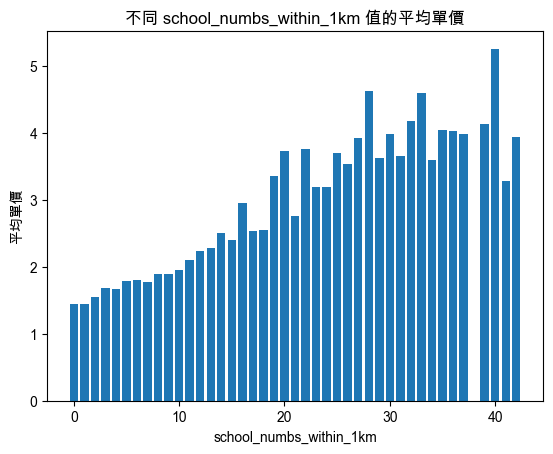

In [549]:
average_prices = data.groupby('school_numbs_within_1km')['單價'].mean()

plt.bar(average_prices.index, average_prices)

plt.xlabel('school_numbs_within_1km')
plt.ylabel('平均單價')
plt.title('不同 school_numbs_within_1km 值的平均單價')


plt.show()

將學校資料保存

In [551]:
school_series = pd.Series(data['school_numbs_within_1km'], name='school_numbs_within_1km')
csv_file = "school_numbs_within_1km.csv"
school_series.to_csv(csv_file, index=False)

檢查整個data的資訊

In [552]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17627 entries, 0 to 17626
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   土地面積                     17627 non-null  float64
 1   移轉層次                     17627 non-null  int64  
 2   總樓層數                     17627 non-null  int64  
 3   屋齡                       17627 non-null  float64
 4   建物面積                     17627 non-null  float64
 5   車位面積                     17627 non-null  float64
 6   車位個數                     17627 non-null  float64
 7   橫坐標                      17627 non-null  int64  
 8   縱坐標                      17627 non-null  int64  
 9   主建物面積                    17627 non-null  float64
 10  陽台面積                     17627 non-null  float64
 11  附屬建物面積                   17627 non-null  float64
 12  單價                       11751 non-null  float64
 13  建物地址                     17627 non-null  object 
 14  平均單價元平方公尺             

「平均單價元平方公尺」存在空值，對其進行KNN補值，

在此之前需要先分離「單價」，以免應變數反過來影響自變數;

確認檔案內都是數值，Bool要改成0/1。

In [618]:
data.dtypes

土地面積                       float64
移轉層次                         int64
總樓層數                         int64
屋齡                         float64
建物面積                       float64
車位面積                       float64
車位個數                       float64
橫坐標                          int64
縱坐標                          int64
主建物面積                      float64
陽台面積                       float64
附屬建物面積                     float64
單價                         float64
建物地址                        object
平均單價元平方公尺                  float64
lng                        float64
lat                        float64
主要用途_住家用                      bool
主要用途_其他                       bool
主要用途_商業用                      bool
主要用途_集合住宅                     bool
主要建材_其他                       bool
主要建材_加強磚造                     bool
主要建材_鋼筋混凝土造                   bool
主要建材_鋼骨造                      bool
hospital_within_1km           bool
railway_within_2km            bool
mrt_numbs_within_1km         int64
school_numbs_within_

In [620]:
bool_columns = data.select_dtypes(include=['bool']).columns

data[bool_columns] = data[bool_columns].astype(int)

data.dtypes

土地面積                       float64
移轉層次                         int64
總樓層數                         int64
屋齡                         float64
建物面積                       float64
車位面積                       float64
車位個數                       float64
橫坐標                          int64
縱坐標                          int64
主建物面積                      float64
陽台面積                       float64
附屬建物面積                     float64
單價                         float64
建物地址                        object
平均單價元平方公尺                  float64
lng                        float64
lat                        float64
主要用途_住家用                     int64
主要用途_其他                      int64
主要用途_商業用                     int64
主要用途_集合住宅                    int64
主要建材_其他                      int64
主要建材_加強磚造                    int64
主要建材_鋼筋混凝土造                  int64
主要建材_鋼骨造                     int64
hospital_within_1km          int64
railway_within_2km           int64
mrt_numbs_within_1km         int64
school_numbs_within_

In [622]:
data.iloc[:,17:23].head()

,主要用途_住家用,主要用途_其他,主要用途_商業用,主要用途_集合住宅,主要建材_其他,主要建材_加強磚造
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,1,1,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0


In [623]:
price = data['單價']
data.drop('單價',axis=1,inplace=True)


In [624]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
data['平均單價元平方公尺'] = knn_imputer.fit_transform(data[['平均單價元平方公尺']])

In [554]:
data['平均單價元平方公尺'].describe()

count     17627.000000
mean     108454.360006
std       31322.093779
min        5928.000000
25%       90999.322610
50%      108454.360006
75%      121253.984127
max      510439.368421
Name: 平均單價元平方公尺, dtype: float64

至此，經緯度已經可以拋棄了。

In [626]:
data.drop(['lat','lng'], axis=1, inplace=True)

將單價併回在最後一欄位，以方便我們進行模型訓練。

In [627]:
data = pd.concat([data,price],axis=1)

檢查data

In [628]:
print(data.columns)
print('-'*50)
print(data.info())

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標',
       '主建物面積', '陽台面積', '附屬建物面積', '建物地址', '平均單價元平方公尺', '主要用途_住家用', '主要用途_其他',
       '主要用途_商業用', '主要用途_集合住宅', '主要建材_其他', '主要建材_加強磚造', '主要建材_鋼筋混凝土造',
       '主要建材_鋼骨造', 'hospital_within_1km', 'railway_within_2km',
       'mrt_numbs_within_1km', 'school_numbs_within_1km', '單價'],
      dtype='object')
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17627 entries, 0 to 17626
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   土地面積                     17627 non-null  float64
 1   移轉層次                     17627 non-null  int64  
 2   總樓層數                     17627 non-null  int64  
 3   屋齡                       17627 non-null  float64
 4   建物面積                     17627 non-null  float64
 5   車位面積                     17627 non-null  float64
 6   車位個數                     176

還存在一個非可轉換數值欄位：建物地址，drop掉

In [629]:
print('-'*50)
print(data.dtypes.value_counts())

--------------------------------------------------
int64      16
float64    10
object      1
Name: count, dtype: int64


In [630]:
data.drop('建物地址',axis=1,inplace=True)

In [631]:
data.head()

,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,...,主要用途_集合住宅,主要建材_其他,主要建材_加強磚造,主要建材_鋼筋混凝土造,主要建材_鋼骨造,hospital_within_1km,railway_within_2km,mrt_numbs_within_1km,school_numbs_within_1km,單價
0,-0.256716,11,11,32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,...,0,0,0,1,0,1,0,2,26,4.627714
1,0.100134,7,12,24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,...,0,0,0,1,0,0,1,0,8,1.887258
2,0.181921,10,15,6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,...,1,1,0,0,0,0,1,0,1,1.489072
3,0.085594,9,14,8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,...,1,0,0,1,0,0,0,3,5,2.051217
4,-0.938116,41,43,11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,...,0,0,0,0,1,1,1,3,13,3.269198


保存data(畢竟花超久才整理好)

In [72]:
data_1102 = data
csv_file = "data_1102.csv"
data_1102.to_csv(csv_file, index=False)

AttributeError: 'dict' object has no attribute 'to_csv'

最後，將train_data與submit_data拆開。

In [3]:
data = pd.read_csv('dataset_1109_public.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17627 entries, 0 to 17626
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   土地面積                      17627 non-null  float64
 1   移轉層次                      17627 non-null  int64  
 2   總樓層數                      17627 non-null  int64  
 3   屋齡                        17627 non-null  float64
 4   車位面積                      17627 non-null  float64
 5   橫坐標                       17627 non-null  int64  
 6   縱坐標                       17627 non-null  int64  
 7   主建物面積                     17627 non-null  float64
 8   附屬建物面積                    17627 non-null  float64
 9   平均單價元平方公尺                 17627 non-null  float64
 10  主要用途_商業用                  17627 non-null  int64  
 11  主要用途_集合住宅                 17627 non-null  int64  
 12  主要建材_其他                   17627 non-null  int64  
 13  主要建材_加強磚造                 17627 non-null  int64  
 14  主要建材_鋼

In [4]:
data.drop('atm_numbs_within_0.5km', axis=1 ,inplace=True)
data.drop('平均單價元平方公尺', axis=1 ,inplace=True)
price_pu = pd.read_csv('average_prices_5years_pu_1113_mean.csv')
data.insert(22,'平均單價元平方公尺', price_pu)

In [5]:
data.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '車位面積', '橫坐標', '縱坐標', '主建物面積', '附屬建物面積',
       '主要用途_商業用', '主要用途_集合住宅', '主要建材_其他', '主要建材_加強磚造', '主要建材_鋼筋混凝土造',
       '主要建材_鋼骨造', 'mrt_numbs_within_1km', 'school_numbs_within_1km',
       'store_numbs_within_0.5km', '縣市區域價格', 'bus_numbs_within_0.5km',
       'bike_numbs_within_0.5km', 'hos_numbs_within_0.5km', '平均單價元平方公尺', '單價'],
      dtype='object')

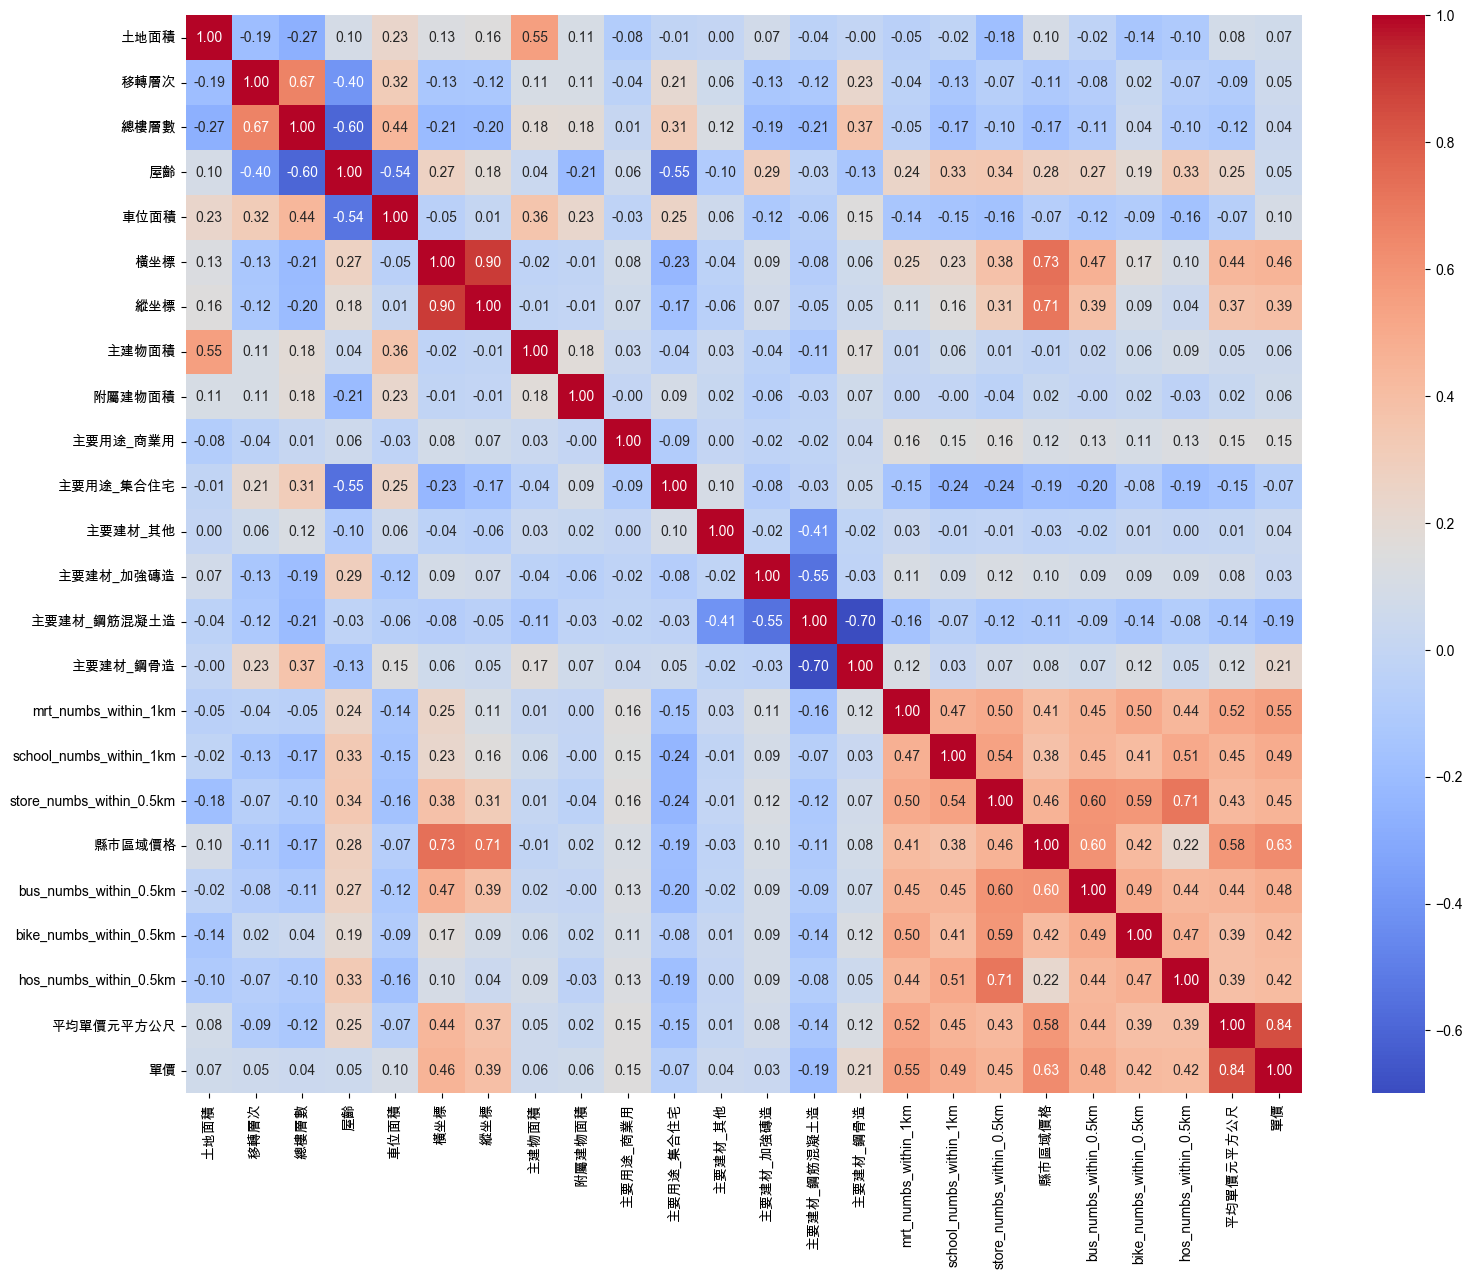

In [7]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = data.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [8]:
dataTrain = data.iloc[:11751, :]
dataSubmit = data.iloc[11751:, :-1]
dataTrain.tail()

,土地面積,移轉層次,總樓層數,屋齡,車位面積,橫坐標,縱坐標,主建物面積,附屬建物面積,主要用途_商業用,...,主要建材_鋼骨造,mrt_numbs_within_1km,school_numbs_within_1km,store_numbs_within_0.5km,縣市區域價格,bus_numbs_within_0.5km,bike_numbs_within_0.5km,hos_numbs_within_0.5km,平均單價元平方公尺,單價
11746,0.706189,4,5,28.333333,0.484488,280165,2758675,0.146962,-0.171559,0,...,0,0.000000,0.000000,2.449490,5,63,1,7,55831.128284,0.903505
11747,-0.225809,2,7,29.250000,-0.819326,247333,2743084,-0.181192,-0.163018,0,...,0,0.000000,2.645751,2.449490,7,27,1,19,82465.747573,1.044041
11748,-0.943908,15,17,22.833333,-0.819326,316680,2773938,-0.901999,-0.171559,0,...,0,0.000000,2.449490,3.605551,9,87,10,17,106780.293976,2.144908
11749,-1.147111,12,16,25.083333,-0.819326,295794,2763966,-1.333408,-0.438452,0,...,0,1.000000,2.000000,3.741657,9,88,13,24,120003.463581,2.285444
11750,-0.398154,11,27,2.250000,0.442779,300173,2772198,0.823638,-0.438452,0,...,1,1.414214,2.645751,3.464102,9,43,6,10,132231.237410,2.660207


In [9]:
dataSubmit.head()

,土地面積,移轉層次,總樓層數,屋齡,車位面積,橫坐標,縱坐標,主建物面積,附屬建物面積,主要用途_商業用,...,主要建材_鋼筋混凝土造,主要建材_鋼骨造,mrt_numbs_within_1km,school_numbs_within_1km,store_numbs_within_0.5km,縣市區域價格,bus_numbs_within_0.5km,bike_numbs_within_0.5km,hos_numbs_within_0.5km,平均單價元平方公尺
11751,2.039378,3,7,13.916667,0.146176,288745,2760266,0.849664,-0.438452,0,...,1,0,0.000000,2.449490,2.449490,9,138,7,6,130028.071429
11752,-0.077786,5,5,40.833333,-0.819326,298751,2773492,-0.004102,-0.438452,0,...,1,0,1.000000,3.872983,4.795832,9,107,19,22,120218.036036
11753,-0.555766,2,20,1.333333,-0.167419,297000,2769106,-0.285862,1.323042,0,...,1,0,1.732051,3.316625,4.795832,9,28,14,18,150262.399247
11754,-0.744838,6,16,27.500000,0.115280,293076,2771160,0.027582,-0.139532,0,...,1,0,0.000000,2.828427,2.645751,9,102,4,10,89064.663883
11755,-0.610923,3,7,40.500000,-0.819326,308103,2770220,-0.883328,-0.075477,0,...,1,0,1.732051,3.605551,5.000000,10,154,9,89,282618.022312


### 終於，我們將特徵工程處理完畢，以下我們利用neural network來進行預測。

In [10]:
X, y = dataTrain.iloc[:,:-1], dataTrain.iloc[:,-1]

In [11]:
mean = Ｘ.mean(axis=0)
Ｘ -= mean
std = Ｘ.std(axis=0)
Ｘ /= std

dataSubmit -= mean
dataSubmit /= std

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-11-13 15:16:00.904262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
X_train.shape

(9400, 23)

In [15]:
X

,土地面積,移轉層次,總樓層數,屋齡,車位面積,橫坐標,縱坐標,主建物面積,附屬建物面積,主要用途_商業用,...,主要建材_鋼筋混凝土造,主要建材_鋼骨造,mrt_numbs_within_1km,school_numbs_within_1km,store_numbs_within_0.5km,縣市區域價格,bus_numbs_within_0.5km,bike_numbs_within_0.5km,hos_numbs_within_0.5km,平均單價元平方公尺
0,-0.256586,0.700789,-0.234309,0.780855,-0.815310,0.739143,0.531364,0.340924,-0.392335,-0.171296,...,0.273160,-0.192281,0.827889,2.227017,0.727251,1.035105,1.510537,2.363961,0.674156,2.453145
1,0.076210,-0.085216,-0.088110,0.197400,-0.815310,0.647483,0.527179,-0.318138,-0.392335,-0.171296,...,0.273160,-0.192281,-0.879634,0.166539,-0.269662,1.035105,-0.427899,-0.100118,-0.701431,0.095949
2,0.152483,0.504288,0.350486,-1.050385,0.136404,-1.666726,-2.313043,-0.116481,1.275532,-0.171296,...,-3.660546,-0.192281,-0.879634,-1.492691,-0.269662,-1.321100,-0.987892,-0.996147,-0.435188,-0.450918
3,0.062649,0.307787,0.204288,-0.865528,0.488613,0.567109,0.574260,-0.090749,0.176915,-0.171296,...,0.273160,-0.192281,1.211646,-0.371005,-0.125618,0.642404,-0.011495,0.571904,-0.745805,0.098165
4,-0.892055,6.595823,4.444049,-0.715332,0.496106,0.581570,0.532378,0.710367,-0.392335,-0.171296,...,-3.660546,5.200293,1.211646,0.871750,2.243204,0.642404,1.366949,2.811976,1.916621,1.123310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,0.641412,-0.674719,-1.111501,0.486239,0.449645,0.237780,0.426707,0.111697,-0.165722,-0.171296,...,0.273160,-0.192281,-0.879634,-2.400154,-0.758317,-0.928399,-0.341747,-1.220154,-0.701431,-0.901222
11747,-0.227763,-1.067721,-0.819103,0.549784,-0.815310,-0.418001,0.258542,-0.192890,-0.158471,-0.171296,...,0.273160,-0.192281,-0.879634,0.000767,-0.758317,-0.142998,-0.858663,-1.220154,-0.168946,-0.487051
11748,-0.897456,1.486793,0.642884,0.104972,-0.815310,0.967125,0.591334,-0.861931,-0.165722,-0.171296,...,0.273160,-0.192281,-0.879634,-0.177333,0.267849,0.642404,0.002864,0.795911,-0.257693,-0.108957
11749,-1.086963,0.897290,0.496685,0.260945,-0.815310,0.549951,0.483776,-1.262357,-0.392335,-0.171296,...,0.273160,-0.192281,0.327767,-0.585228,0.388663,0.642404,0.017223,1.467932,0.052923,0.096664


In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# 建立一個Sequential型態的model
model = keras.Sequential(name='model')
model.add(layers.Dense(64, activation='relu', input_shape=(23,)))
model.add(layers.Dropout(0.2)) #hyperparameter
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

# 顯示網路模型架構
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                1536      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65    

In [18]:
model_dir = 'lab2-logs/models/'
os.makedirs(model_dir)

FileExistsError: [Errno 17] File exists: 'lab2-logs/models/'

In [23]:
model.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanAbsoluteError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

log_dir = os.path.join('lab2-logs', 'model')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model.h5',
                                             monitor='val_mean_absolute_error',
                                             save_best_only=True,
                                             mode='min')
history =   model.fit(X_train, y_train,
            batch_size=256 ,
            epochs=500,
            validation_data=(X_val, y_val),
            callbacks=[model_cbk, model_mckp])

Epoch 1/500


37/37 [==============================] - 1s 13ms/step - loss: 1.1462 - mean_absolute_error: 0.9069 - val_loss: 0.6959 - val_mean_absolute_error: 0.4737
Epoch 2/500
33/37 [=========================>....] - ETA: 0s - loss: 0.6105 - mean_absolute_error: 0.4021

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 0s 6ms/step - loss: 0.6037 - mean_absolute_error: 0.3968 - val_loss: 0.5278 - val_mean_absolute_error: 0.3361
Epoch 3/500
37/37 [==============================] - 0s 7ms/step - loss: 0.4956 - mean_absolute_error: 0.3158 - val_loss: 0.4618 - val_mean_absolute_error: 0.2935
Epoch 4/500
37/37 [==============================] - 0s 6ms/step - loss: 0.4385 - mean_absolute_error: 0.2793 - val_loss: 0.4186 - val_mean_absolute_error: 0.2682
Epoch 5/500
37/37 [==============================] - 0s 5ms/step - loss: 0.4023 - mean_absolute_error: 0.2589 - val_loss: 0.3893 - val_mean_absolute_error: 0.2526
Epoch 6/500
37/37 [==============================] - 0s 4ms/step - loss: 0.3776 - mean_absolute_error: 0.2464 - val_loss: 0.3692 - val_mean_absolute_error: 0.2436
Epoch 7/500
37/37 [==============================] - 0s 4ms/step - loss: 0.3582 - mean_absolute_error: 0.2372 - val_loss: 0.3553 - val_mean_absolute_error: 0.2389
Epoch 8/500
37/37 [===============

In [24]:
history.history.keys()  # 查看history儲存的資訊有哪些

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

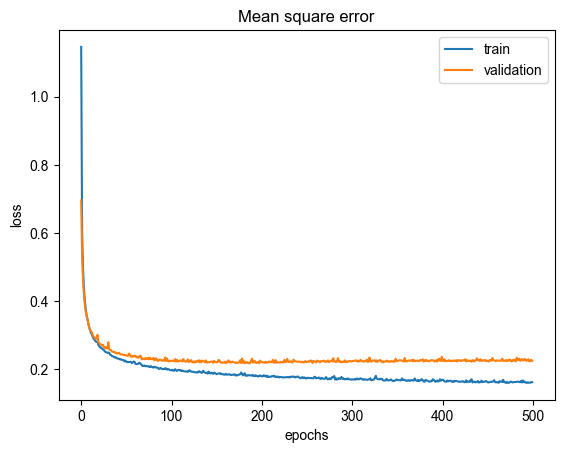

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Mean square error')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

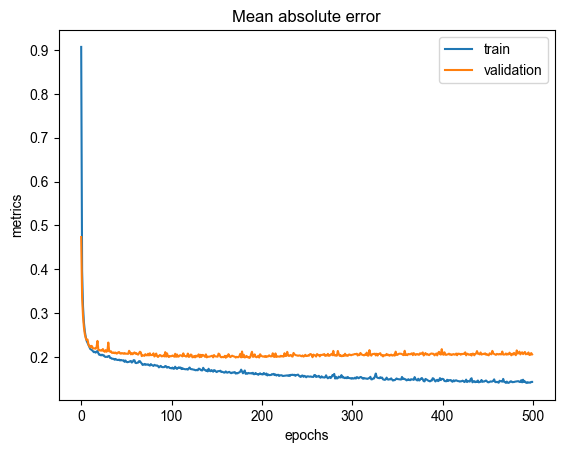

In [26]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.title('Mean absolute error')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [27]:
model = keras.models.load_model('lab2-logs/models/Best-model.h5')

In [28]:
submit_lr = model.predict(dataSubmit)
submit_lr

184/184 [==============================] - 0s 1ms/step


array([[1.9036627],
       [1.9243542],
       [2.6288738],
       ...,
       [2.099106 ],
       [3.0395317],
       [2.0244176]], dtype=float32)

In [29]:
submit_lr = submit_lr.reshape(-1)

In [30]:
pd.Series(submit_lr).describe()

count    5876.000000
mean        1.979907
std         0.938659
min         0.633889
25%         1.300881
50%         1.747383
75%         2.415561
max         8.566549
dtype: float64

In [33]:
dataPrivate = pd.read_csv('dataset_private_1109.csv')
dataPrivate.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '車位面積', '橫坐標', '縱坐標', '主建物面積', '附屬建物面積',
       '主要用途_商業用', '主要用途_集合住宅', '主要建材_其他', '主要建材_加強磚造', '主要建材_鋼筋混凝土造',
       '主要建材_鋼骨造', 'mrt_numbs_within_1km', 'school_numbs_within_1km',
       'store_numbs_within_0.5km', '縣市區域價格', 'bus_numbs_within_0.5km',
       'bike_numbs_within_0.5km', 'atm_numbs_within_0.5km',
       'hos_numbs_within_0.5km', '平均單價元平方公尺'],
      dtype='object')

In [34]:
dataPrivate.drop('atm_numbs_within_0.5km', axis=1, inplace=True)
dataPrivate.drop('平均單價元平方公尺', axis=1, inplace=True)

In [35]:
price_pr = pd.read_csv('average_prices_5years_pr_1113_mean.csv')
dataPrivate.insert(22,'平均單價元平方公尺', price_pr)

In [37]:
dataPrivate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   土地面積                      5875 non-null   float64
 1   移轉層次                      5875 non-null   int64  
 2   總樓層數                      5875 non-null   int64  
 3   屋齡                        5875 non-null   float64
 4   車位面積                      5875 non-null   float64
 5   橫坐標                       5875 non-null   int64  
 6   縱坐標                       5875 non-null   int64  
 7   主建物面積                     5875 non-null   float64
 8   附屬建物面積                    5875 non-null   float64
 9   主要用途_商業用                  5875 non-null   int64  
 10  主要用途_集合住宅                 5875 non-null   int64  
 11  主要建材_其他                   5875 non-null   int64  
 12  主要建材_加強磚造                 5875 non-null   int64  
 13  主要建材_鋼筋混凝土造               5875 non-null   int64  
 14  主要建材_鋼骨造

In [42]:
dataPrivate -= mean
dataPrivate /= std

In [43]:
submit_pr = model.predict(dataPrivate)
submit_pr

 36/184 [====>.........................] - ETA: 0s

184/184 [==============================] - 0s 2ms/step


array([[2.1726189 ],
       [2.4188218 ],
       [4.8192844 ],
       ...,
       [1.5274533 ],
       [0.03016888],
       [1.0819589 ]], dtype=float32)

In [44]:
submit_pr =submit_pr.reshape(-1)

In [45]:
pd.Series(submit_pr).describe()

count    5875.000000
mean        1.829312
std         1.329642
min        -0.196603
25%         0.834502
50%         1.555032
75%         2.483953
max         8.616035
dtype: float64

In [22]:
TONY = pd.read_csv('1102_mean_xgb_rf_UPDATE.csv')

In [23]:
TONY['predicted_price'] = pd.Series(submit_lr)

In [126]:
TONY.to_csv('TONY1103_ALL_Dense_Layer.csv',index=False, encoding='utf-8')